In [20]:
import os
import numpy as np
from IPython.display import display
import pandas as pd
# import kagglehub
import matplotlib.pyplot as plt

# **Kaggle NYT Headline Data**

To collect the News Headline data, we plan to use the Kaggle source linked below: (https://www.kaggle.com/datasets/johnbandy/new-york-times-headlines). In this dataset, the contributors collected every NYT headline using the NYT API from January 1, 1990 to 2020. 

In [21]:
# Download the data
# path = kagglehub.dataset_download("johnbandy/new-york-times-headlines")
# print("Path to dataset files:", path)

In [13]:
# Consolidate all csv files into one dataframe
archive_path = "archive"

dfs = []
for filename in os.listdir(archive_path):
    if filename.endswith(".csv") and filename.startswith("new_york_times_stories_"):
        file_path = os.path.join(archive_path, filename)
        
        df = pd.read_csv(file_path, dtype={"print_page": str})
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

In [14]:
# Summary stats of the dataframe
print("Combined Dataframe:\n")
print("Sample data entries:")
display(df.head())

Combined Dataframe:

Sample data entries:


,headline,source,word_count,url,print_section,print_page,author,type,pub_date,news_desk,section,year
0,Bridge,The New York Times,411.0,https://www.nytimes.com/1990/01/01/nyregion/br...,1,45.0,By Alan Truscott,article,1990-01-01T05:00:00+0000,Metropolitan Desk,New York,1990.0
1,He Has Tyson On His Mind,The New York Times,199.0,https://www.nytimes.com/1990/01/01/sports/spor...,1,38.0,By Phil Berger,article,1990-01-01T05:00:00+0000,Sports Desk,Sports,1990.0
2,"For Dinkins, Pomp, Ceremony, Triumph And a Dre...",The New York Times,1233.0,https://www.nytimes.com/1990/01/01/nyregion/fo...,1,27.0,By Don Terry,article,1990-01-01T05:00:00+0000,Metropolitan Desk,New York,1990.0
3,Army Doesn't Have to Compete With Marines; W...,The New York Times,524.0,https://www.nytimes.com/1990/01/01/opinion/l-a...,1,24.0,NaN,article,1990-01-01T05:00:00+0000,Editorial Desk,Opinion,1990.0
4,Students Must Get to School and Back Safely,The New York Times,363.0,https://www.nytimes.com/1990/01/01/opinion/l-s...,1,24.0,NaN,article,1990-01-01T05:00:00+0000,Editorial Desk,Opinion,1990.0


## **EDA**

In this section, we check for potential data issues (missingness, imbalance, scaling).

In [15]:
# Check missingness
print("Number of rows:", len(df), "\n")
print("Column lengths:")
print(df.count().sort_values(ascending=False))

Number of rows: 2938871 

Column lengths:
source           2938869
word_count       2938869
url              2938869
type             2938869
pub_date         2938869
year             2938869
headline         2938287
section          2937776
news_desk        2633326
print_section    2249248
print_page       2247995
author           2170493
dtype: int64


In [16]:
no_headline_df = df[df['headline'].isna()]
# Just to check no_headline_df is the correct size
assert len(no_headline_df) == len(df) - df['headline'].count()
print("Number of missing headlines:", len(no_headline_df))

display(no_headline_df)

Number of missing headlines: 584


,headline,source,word_count,url,print_section,print_page,author,type,pub_date,news_desk,section,year
24167,NaN,The New York Times,1963.0,https://www.nytimes.com/1990/03/25/books/.html,7,28.0,By Kurt W. Forster,article,1990-03-25T05:00:00+0000,Book Review Desk,Books,1990.0
57514,NaN,The New York Times,750.0,https://www.nytimes.com/1990/07/22/nyregion/.html,12WC,10.0,By Herbert Hadad,article,1990-07-22T05:00:00+0000,Westchester Weekly Desk,New York,1990.0
183866,NaN,The New York Times,5272.0,https://www.nytimes.com/1991/12/29/magazine/.html,6,10.0,By Davis Handelman,article,1991-12-29T05:00:00+0000,Magazine Desk,Magazine,1991.0
205779,NaN,The New York Times,1221.0,https://www.nytimes.com/1993/04/06/opinion/.html,A,23.0,By Stanley Fischer,article,1993-04-06T05:00:00+0000,Editorial Desk,Opinion,1993.0
252497,NaN,The New York Times,468.0,https://www.nytimes.com/1993/10/31/nyregion/.html,13WC,6.0,By Lynne Ames,article,1993-10-31T05:00:00+0000,Westchester Weekly Desk,New York,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2741518,NaN,The New York Times,0.0,https://www.nytimes.com/slideshow/2005/12/09/r...,NaN,NaN,NaN,multimedia,2005-12-09T12:27:00+0000,Real Estate,Real Estate,2005.0
2741520,NaN,The New York Times,0.0,https://www.nytimes.com/slideshow/2005/12/09/n...,NaN,NaN,NaN,multimedia,2005-12-09T12:50:00+0000,NaN,NaN,2005.0
2743958,NaN,The New York Times,0.0,https://www.nytimes.com/slideshow/2005/12/16/r...,NaN,NaN,NaN,multimedia,2005-12-16T10:42:00+0000,Real Estate,Real Estate,2005.0
2746233,NaN,The New York Times,0.0,https://www.nytimes.com/slideshow/2005/12/23/r...,NaN,NaN,NaN,multimedia,2005-12-23T09:26:00+0000,Real Estate,Real Estate,2005.0


Total number of headlines with a date: 2938285


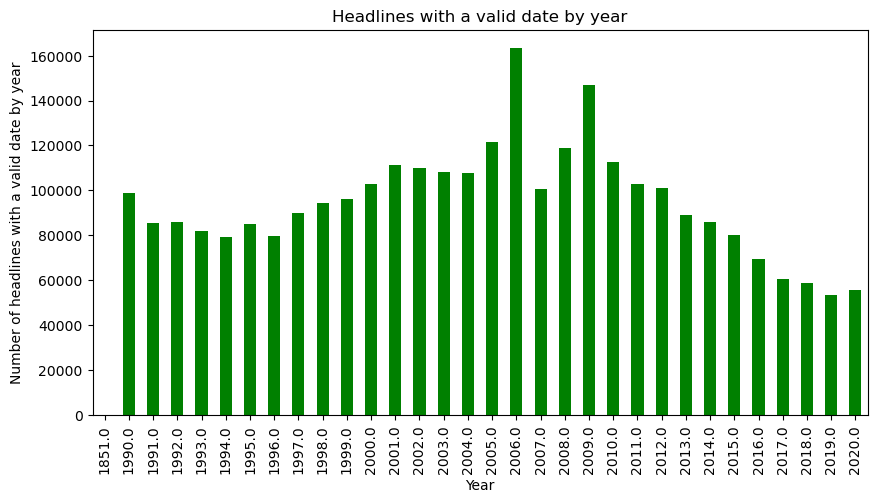

Average headlines per year: 97942.83333333333


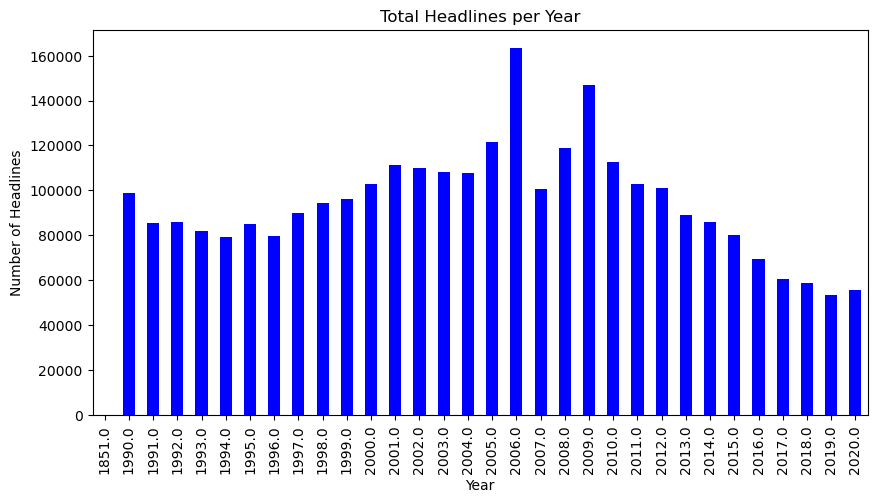

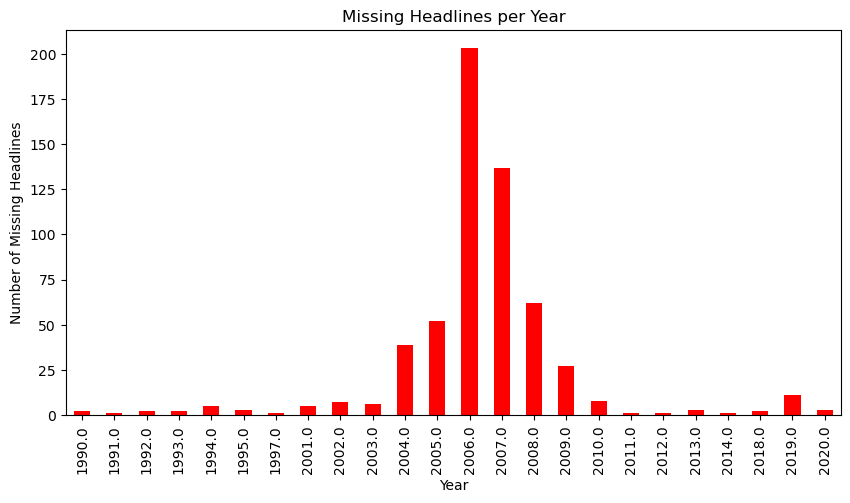

In [18]:
headlines_with_date_per_year = df[df['pub_date'].notna()].groupby('year')['headline'].count()

total_headlines_with_date = headlines_with_date_per_year.sum()
print("Total number of headlines with a date:", total_headlines_with_date)

# Plot headlines with a date for each year
plt.figure(figsize=(10, 5))
headlines_with_date_per_year.plot(kind='bar', color='green')
plt.xlabel('Year')
plt.ylabel('Number of headlines with a valid date by year')
plt.title('Headlines with a valid date by year')
plt.show()

print("Average headlines per year:", total_headlines_with_date / 30)

total_headlines_per_year = df.groupby('year')['headline'].count()
plt.figure(figsize=(10, 5))
total_headlines_per_year.plot(kind='bar', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Headlines')
plt.title('Total Headlines per Year')
plt.show()

# Plot missing headlines per year
missing_headlines_per_year = df[df['headline'].isna()].groupby('year').size()
plt.figure(figsize=(10, 5))
missing_headlines_per_year.plot(kind='bar', color='red')
plt.xlabel('Year')
plt.ylabel('Number of Missing Headlines')
plt.title('Missing Headlines per Year')
plt.show()




Average length of a headline (number of words): 6.822194360183332
Variance of headline length is: 11.0950692037166
Standard deviation of headline length is 3.3309261780646837 words


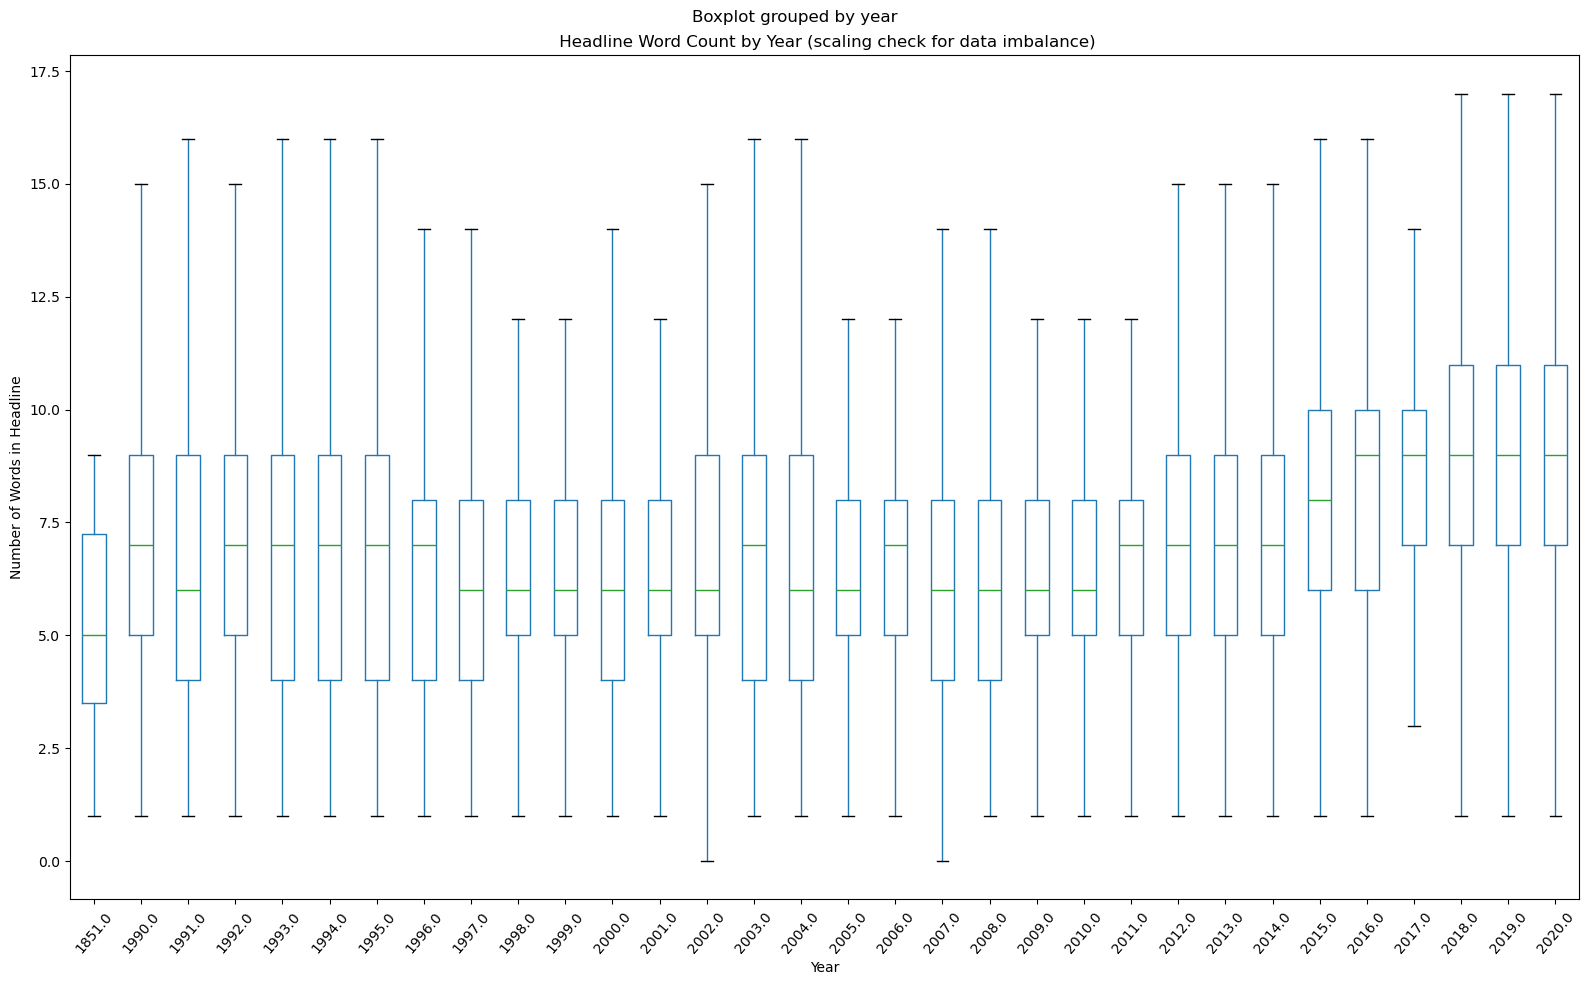

In [19]:
df_non_na_headlines = df[df['headline'].notnull()].copy() # there are 584 null values as seen above

df_non_na_headlines['headline_word_count'] = df_non_na_headlines['headline'].apply(lambda x: len(x.split()))

print("Average length of a headline (number of words):", df_non_na_headlines['headline_word_count'].mean())
print("Variance of headline length is:", df_non_na_headlines['headline_word_count'].var())
print("Standard deviation of headline length is", df_non_na_headlines['headline_word_count'].std(), "words")


# plt.figure(figsize=(16, 10))
ax = df_non_na_headlines.boxplot(column='headline_word_count', by='year', grid=False, showfliers=False)
ax.figure.set_size_inches(16, 10)
plt.title(' Headline Word Count by Year (scaling check for data imbalance)')
# plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('Number of Words in Headline')
plt.xticks(rotation = 50) 
plt.tight_layout()  
plt.show()